### Feature Extraction

In [1]:
import pandas as pd

df = pd.read_csv('dataset/Qabas-dataset-cleaned.csv')
df.head()

,lemma_id,lemma,language,pos_cat,pos,root,gender,normalized_lemma,reshaped_lemma,char_tokens,letter_shapes
0,2023254710,سَاوِي,عامية,اسم,صفة,س و ي,مذكر,ساوي,ﻱﻭﺎﺳ,"['س', 'ا', 'و', 'ي']","[['س', 'ﺱ', 'ﺴ', 'ﺳ', 'ﺴ'], ['ا', 'ﺍ', 'ﺎ'], [..."
1,2023254711,رْكِيد,عامية,اسم,اسم,ر ك د,مذكر,ركيد,ﺪﻴﻛﺭ,"['ر', 'ك', 'ي', 'د']","[['ر', 'ﺭ', 'ﺮ'], ['ك', 'ﻙ', 'ﻜ', 'ﻛ', 'ﻜ'], [..."
2,2023254712,دُمَاجٌ,عامية,اسم,اسم,د م ج,مذكر,دماج,ﺝﺎﻣﺩ,"['د', 'م', 'ا', 'ج']","[['د', 'ﺩ', 'ﺪ'], ['م', 'ﻡ', 'ﻤ', 'ﻣ', 'ﻤ'], [..."
3,2023254713,دَامِرٌ,عامية,اسم,اسم,د م ر,مذكر,دامر,ﺮﻣﺍﺩ,"['د', 'ا', 'م', 'ر']","[['د', 'ﺩ', 'ﺪ'], ['ا', 'ﺍ', 'ﺎ'], ['م', 'ﻡ', ..."
4,2023254714,جَعَارٌ,عامية,اسم,صفة,ج ع ر,مذكر,جعار,ﺭﺎﻌﺟ,"['ج', 'ع', 'ا', 'ر']","[['ج', 'ﺝ', 'ﺠ', 'ﺟ', 'ﺠ'], ['ع', 'ﻉ', 'ﻌ', 'ﻋ..."


In [2]:
!pip install --upgrade numpy gensim


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.4-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 10.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 19.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 23.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.16.2 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.5.1 which is incompatible.
streaml

In [3]:
import numpy as np
from gensim.models import KeyedVectors


In [4]:
# Tag each letter with its position type
def tag_letter_positions(tokens):
    n = len(tokens)
    positions = []
    for i, letter in enumerate(tokens):
        if n == 1:
            positions.append('isolated')
        elif i == 0:
            positions.append('initial')
        elif i == n - 1:
            positions.append('final')
        else:
            positions.append('medial')
    return positions

df['letter_positions'] = df['char_tokens'].apply(tag_letter_positions)
df.head()


,lemma_id,lemma,language,pos_cat,pos,root,gender,normalized_lemma,reshaped_lemma,char_tokens,letter_shapes,letter_positions
0,2023254710,سَاوِي,عامية,اسم,صفة,س و ي,مذكر,ساوي,ﻱﻭﺎﺳ,"['س', 'ا', 'و', 'ي']","[['س', 'ﺱ', 'ﺴ', 'ﺳ', 'ﺴ'], ['ا', 'ﺍ', 'ﺎ'], [...","[initial, medial, medial, medial, medial, medi..."
1,2023254711,رْكِيد,عامية,اسم,اسم,ر ك د,مذكر,ركيد,ﺪﻴﻛﺭ,"['ر', 'ك', 'ي', 'د']","[['ر', 'ﺭ', 'ﺮ'], ['ك', 'ﻙ', 'ﻜ', 'ﻛ', 'ﻜ'], [...","[initial, medial, medial, medial, medial, medi..."
2,2023254712,دُمَاجٌ,عامية,اسم,اسم,د م ج,مذكر,دماج,ﺝﺎﻣﺩ,"['د', 'م', 'ا', 'ج']","[['د', 'ﺩ', 'ﺪ'], ['م', 'ﻡ', 'ﻤ', 'ﻣ', 'ﻤ'], [...","[initial, medial, medial, medial, medial, medi..."
3,2023254713,دَامِرٌ,عامية,اسم,اسم,د م ر,مذكر,دامر,ﺮﻣﺍﺩ,"['د', 'ا', 'م', 'ر']","[['د', 'ﺩ', 'ﺪ'], ['ا', 'ﺍ', 'ﺎ'], ['م', 'ﻡ', ...","[initial, medial, medial, medial, medial, medi..."
4,2023254714,جَعَارٌ,عامية,اسم,صفة,ج ع ر,مذكر,جعار,ﺭﺎﻌﺟ,"['ج', 'ع', 'ا', 'ر']","[['ج', 'ﺝ', 'ﺠ', 'ﺟ', 'ﺠ'], ['ع', 'ﻉ', 'ﻌ', 'ﻋ...","[initial, medial, medial, medial, medial, medi..."


In [5]:
# Flatten the DataFrame to character-level
records = []

for idx, row in df.iterrows():
    lemma_id = row['lemma_id']
    lemma = row['normalized_lemma']
    tokens = row['char_tokens']
    positions = row['letter_positions']
    shapes = row['letter_shapes']

    for i in range(len(tokens)):
        records.append({
            'lemma_id': lemma_id,
            'lemma': lemma,
            'char_index': i,
            'letter': tokens[i],
            'position': positions[i],
            'shape_variants': shapes[i]
        })

char_df = pd.DataFrame(records)


In [6]:
char_df.head()


,lemma_id,lemma,char_index,letter,position,shape_variants
0,2023254710,ساوي,0,[,initial,[
1,2023254710,ساوي,1,',medial,[
2,2023254710,ساوي,2,س,medial,'
3,2023254710,ساوي,3,',medial,س
4,2023254710,ساوي,4,",",medial,'


In [7]:
#Label Encode the Letter
#Convert each Arabic letter into an integer

from sklearn.preprocessing import LabelEncoder

letter_encoder = LabelEncoder()
char_df['letter_id'] = letter_encoder.fit_transform(char_df['letter'])

# Optional: save the mapping
letter_mapping = dict(zip(letter_encoder.classes_, letter_encoder.transform(letter_encoder.classes_)))



In [8]:
#One-Hot Encode the Position
#Convert initial, medial, final, isolated into one-hot columns

position_dummies = pd.get_dummies(char_df['position'], prefix='pos')
char_df = pd.concat([char_df, position_dummies], axis=1)


In [9]:
# Re-add any missing one-hot columns to avoid KeyError
for col in ['pos_initial', 'pos_medial', 'pos_final', 'pos_isolated']:
    if col not in char_df.columns:
        char_df[col] = 0


In [10]:
#Shape-Based Features
# Number of shape variants
char_df['num_shape_variants'] = char_df['shape_variants'].apply(len)

# Unicode of base shape (first shape in list)
char_df['base_shape_unicode'] = char_df['shape_variants'].apply(lambda shapes: ord(shapes[0]) if shapes else 0)


In [11]:
char_df[['letter', 'letter_id', 'position', 'pos_initial', 'pos_medial', 'pos_final', 'pos_isolated', 'num_shape_variants', 'base_shape_unicode']].head()


,letter,letter_id,position,pos_initial,pos_medial,pos_final,pos_isolated,num_shape_variants,base_shape_unicode
0,[,13,initial,True,False,False,0,1,91
1,',1,medial,False,True,False,0,1,91
2,س,35,medial,False,True,False,0,1,39
3,',1,medial,False,True,False,0,1,1587
4,",",3,medial,False,True,False,0,1,39


###Visualization


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

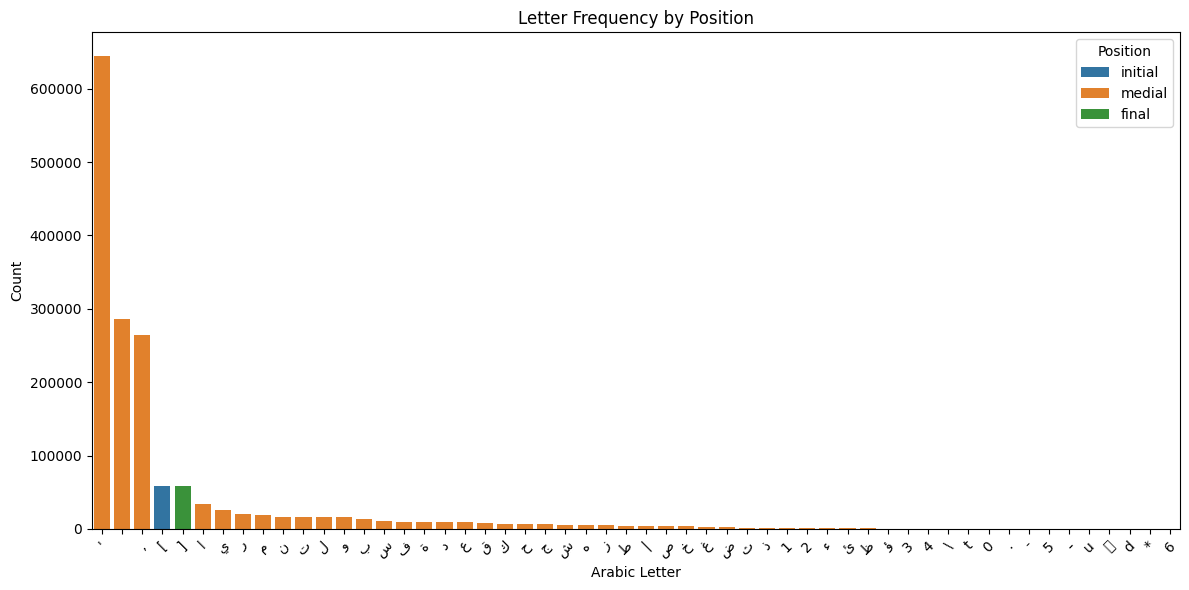

In [12]:
#Letter Frequency by Position
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=char_df, x='letter', hue='position', order=char_df['letter'].value_counts().index)
plt.title("Letter Frequency by Position")
plt.xlabel("Arabic Letter")
plt.ylabel("Count")
plt.legend(title="Position")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
import re

# Define Arabic Unicode range
def is_arabic_letter(char):
    return re.match(r'[\u0620-\u064A]', char) is not None

# Filter the DataFrame
char_df_clean = char_df[char_df['letter'].apply(is_arabic_letter)].copy()

# Optional: Reset index after filtering
char_df_clean.reset_index(drop=True, inplace=True)
char_df_clean.head()

,lemma_id,lemma,char_index,letter,position,shape_variants,letter_id,pos_final,pos_initial,pos_medial,pos_isolated,num_shape_variants,base_shape_unicode
0,2023254710,ساوي,2,س,medial,',35,False,False,True,0,1,39
1,2023254710,ساوي,7,ا,medial,',23,False,False,True,0,1,39
2,2023254710,ساوي,12,و,medial,',51,False,False,True,0,1,39
3,2023254710,ساوي,17,ي,medial,',52,False,False,True,0,1,39
4,2023254711,ركيد,2,ر,medial,',33,False,False,True,0,1,39


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


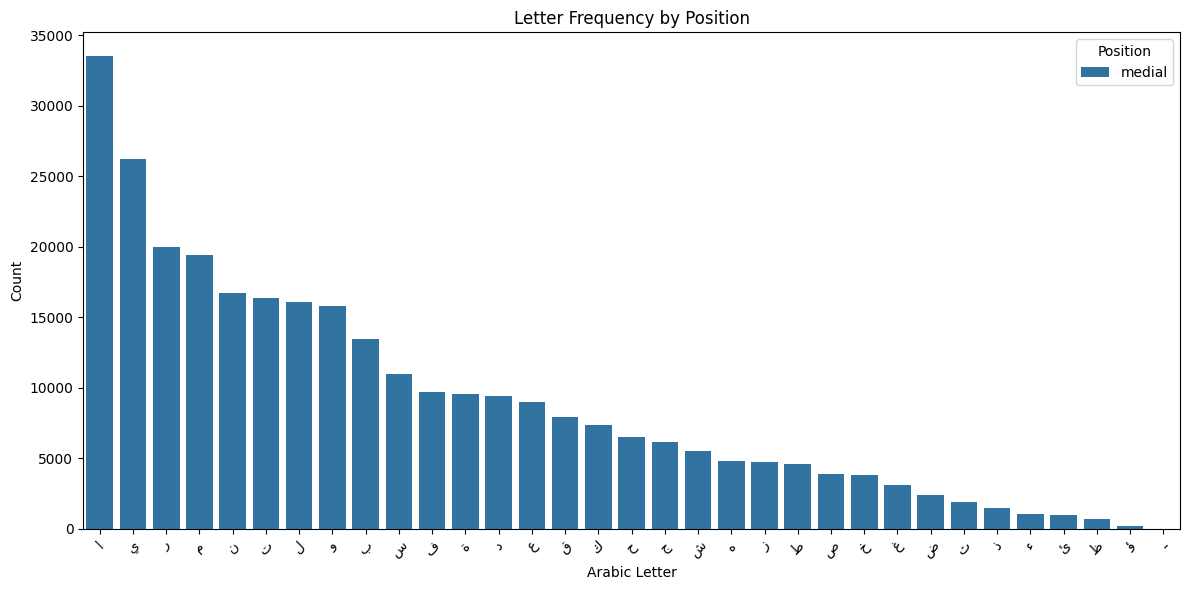

In [15]:
#Letter Frequency by Position
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=char_df_clean, x='letter', hue='position', order=char_df_clean['letter'].value_counts().index)
plt.title("Letter Frequency by Position")
plt.xlabel("Arabic Letter")
plt.ylabel("Count")
plt.legend(title="Position")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

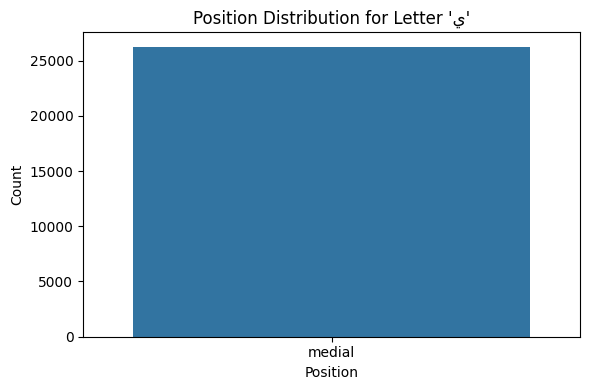

In [16]:
#Position Distribution for a Specific Letter (e.g. "ي")
letter_focus = "ي"
letter_position_counts = char_df[char_df['letter'] == letter_focus]['position'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=letter_position_counts.index, y=letter_position_counts.values)
plt.title(f"Position Distribution for Letter '{letter_focus}'")
plt.xlabel("Position")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


###Embedding-Based Feature Extraction for Arabic Letters


In [17]:
!pip install gensim


Defaulting to user installation because normal site-packages is not writeable


Prepare Data - List of Character Sequences

In [24]:
from gensim.models import FastText

In [23]:
shaped_sentences = df['letter_shapes'].tolist()  # each word as list of shaped forms
letter_model = FastText(shaped_sentences, vector_size=50, window=2, min_count=1, sg=1, epochs=20)

In [26]:
# Define the get_letter_vector function
def get_letter_vector(letter):
	try:
		return letter_model.wv[letter]
	except KeyError:
		return np.zeros(letter_model.vector_size)

# Apply the function to the first shape variant
char_df['letter_embedding'] = char_df['shape_variants'].apply(lambda shapes: get_letter_vector(shapes[0]))

In [27]:
letter_model.wv['ي']


array([ 0.11812426, -0.3607117 ,  0.26395336, -0.22258458,  0.09419315,
       -0.03493469,  0.04653449,  0.02853779,  0.1472972 ,  0.24983013,
        0.02207581, -0.06876344,  0.11008461, -0.08421592,  0.5747396 ,
        0.11670034,  0.14545918,  0.06525522, -0.10289349, -0.3555185 ,
        0.12104082,  0.07942572,  0.04327778, -0.2911688 ,  0.03076461,
        0.01568506,  0.02553504,  0.15659495, -0.27359328, -0.00700751,
        0.07324548, -0.5023872 ,  0.15369457,  0.03210517,  0.03021166,
        0.12091064, -0.05767994, -0.040955  ,  0.40674105,  0.11328465,
        0.3536175 ,  0.12765096, -0.03428529, -0.09628476,  0.1999197 ,
       -0.26520768,  0.61646163, -0.688004  , -0.4583441 ,  0.13178423],
      dtype=float32)

###Structuring the final dataset

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [22]:
#Encode Letter & Position Features
# Label Encode letter
letter_encoder = LabelEncoder()
char_df_clean['letter_id'] = letter_encoder.fit_transform(char_df_clean['letter'])

# One-hot encode position
position_dummies = pd.get_dummies(char_df_clean['position'], prefix='pos')

# Add missing position types if not present
for pos_col in ['pos_initial', 'pos_medial', 'pos_final', 'pos_isolated']:
    if pos_col not in position_dummies.columns:
        position_dummies[pos_col] = 0

char_df_clean = pd.concat([char_df_clean, position_dummies], axis=1)

# Shape feature: number of shape variants
char_df_clean['num_shape_variants'] = char_df_clean['shape_variants'].apply(len)

# Use the actual letter (normalized) as label
char_df_clean["base_shape_unicode"] = char_df_clean["letter"].apply(lambda x: ord(x))

In [30]:
# Flatten the embedding into separate columns
embedding_dim = letter_model.vector_size
embedding_df = pd.DataFrame(char_df['letter_embedding'].tolist(),
                            columns=[f'embedding_{i}' for i in range(embedding_dim)])

# Combine everything
final_df = pd.concat([
    char_df[['lemma_id', 'lemma', 'char_index', 'letter', 'letter_id', 'position',
             'num_shape_variants', 'base_shape_unicode',
             'pos_initial', 'pos_medial', 'pos_final', 'pos_isolated']],
    embedding_df
], axis=1)

final_df.head()


,lemma_id,lemma,char_index,letter,letter_id,position,num_shape_variants,base_shape_unicode,pos_initial,pos_medial,...,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49
0,2023254710,ساوي,0,[,13,initial,1,91,True,False,...,-0.039033,0.122040,0.028280,-0.161470,-0.060091,0.067087,-0.018345,0.038115,-0.441543,0.530142
1,2023254710,ساوي,1,',1,medial,1,91,False,True,...,0.011271,0.054527,-0.076664,0.015907,-0.091826,0.126399,0.119841,0.009380,-0.573630,0.576293
2,2023254710,ساوي,2,س,35,medial,1,39,False,True,...,-0.157184,-0.093029,-0.063822,0.029519,0.672422,0.218081,-0.085644,-0.564145,-0.195410,0.276927
3,2023254710,ساوي,3,',1,medial,1,1587,False,True,...,0.011271,0.054527,-0.076664,0.015907,-0.091826,0.126399,0.119841,0.009380,-0.573630,0.576293
4,2023254710,ساوي,4,",",3,medial,1,39,False,True,...,0.055607,0.146301,-0.127916,0.105109,-0.073792,0.127222,-0.022000,-0.097446,-0.697940,0.457219


In [31]:
final_df.to_csv("final_char_features.csv", index=False)
